## Kurtosis

- Kurtosis is the 4th statistical moment. In probability theory and statistics, kurtosis(meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Like skewness, kurtosis describes a particular aspect of a probability distribution.


• False notation about Kurtosis
https://en.wikipedia.org/wiki/Kurtosis

`Practical Use-case`

- In finance, kurtosis risk refers to the risk associated with the possibility of extreme outcomes or "fat tails" in the distribution of returns of a particular asset or portfolio. If a distribution has high kurtosis, it means that there is a higher likelihood of extreme events occurring, either positive or negative, compared to a normal distribution.

- In finance, kurtosis risk is important to consider because it indicates that there is a greater probability of large losses or gains occurring, which can have significant implications for investors. As a result, investors may want to adjust their investment strategies to account for kurtosis risk.

`Excess Kurtosis & Types`
Excess kurtosis is a measure of how much more peaked or flat a distribution iscompared to a normal distribution, which is considered to have a kurtosis of 0. It is calculated by subtracting 3 from the sample kurtosis coefficient.

`Types of Kurtosis`

- **Leptokurtic** : 
    A distribution with positive excess kurtosis is called leptokurtic. "Lepto-" means "slender". In terms of shape, a leptokurtic distribution has fatter tails. This indicates that there are more extreme values or outliers in the distribution.

    Example - Assets with positive excess kurtosis are riskier and more volatile than those with a normal distribution, and they may experience sudden price movements that can result in significant gains or losses.

- **Platykurtic** : 
    A distribution with negative excess kurtosis is called platykurtic. "Platy-" means "broad". In terms of shape, a platykurtic distribution has thinner tails. This indicates that there are fewer extreme values or outliers in the distribution. 

    Assets with negative excess kurtosis are less risky and less volatile than those with a normal distribution, and they may experience more gradual price movements that are less likely to result in large gains or losses.

- **Mesokurtic** :
    Distributions with zero excess kurtosis are called mesokurtic. The most prominent example of a mesokurtic distribution is the normal distribution family, regardless of the values of its parameters.
    Mesokurtic is a term used to describe a distribution with a excess kurtosis of 0, indicating that it has the same degree of "peakedness" or "flatness" as a normal distribution.

    Example - In finance, a mesokurtic distribution is considered to be the ideal distribution for
    assets or portfolios, as it represents a balance between risk and return.

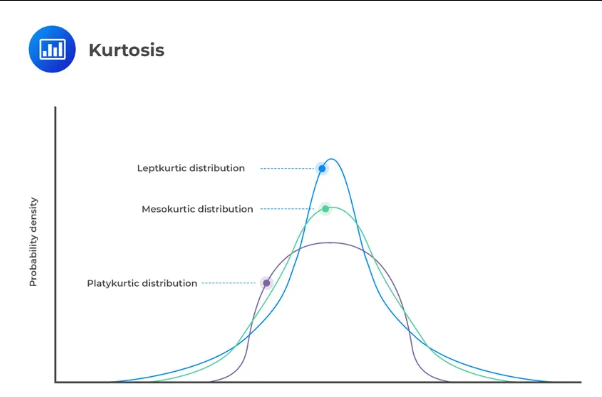



## QQ Plot 
- How to find if a given distribution is normal or not?

**Visual inspection:**
One of the easiest ways to check for normality is to visually inspect a histogram or a density plot of the data. A normal distribution has a bell-shaped curve, which means that the majority of the data falls in the middle, and the tails taper off symmetrically. If the distribution looks approximately bell-shaped, it is likely to be normal.

**QQ Plot:** Another way to check for normality is to create a normal probability plot
(also known as a Q-Q plot) of the data. A normal probability plot plots the observed
data against the expected values of a normal distribution. If the data points fall along
a straight line, the distribution is likely to be normal.

**Statistical tests:** 
There are several statistical tests that can be used to test for normality, such as the Shapiro-Wilk test, the Anderson-Darling test, and the Kolmogorov-Smirnov test. These tests compare the observed data to the expected values of a normal distribution and provide a p-value that indicates whether the data is likely to be normal or not. A p-value less than the significance level (usually 0.05) suggests that the data is not normal.



## What is a QQ Plot and how is it plotted?
A QQ plot (quantile-quantile plot) is a graphical tool used to assess the similarity of the distribution of two sets of data. It is
particularly useful for determining whether a set of data follows a normal distribution.

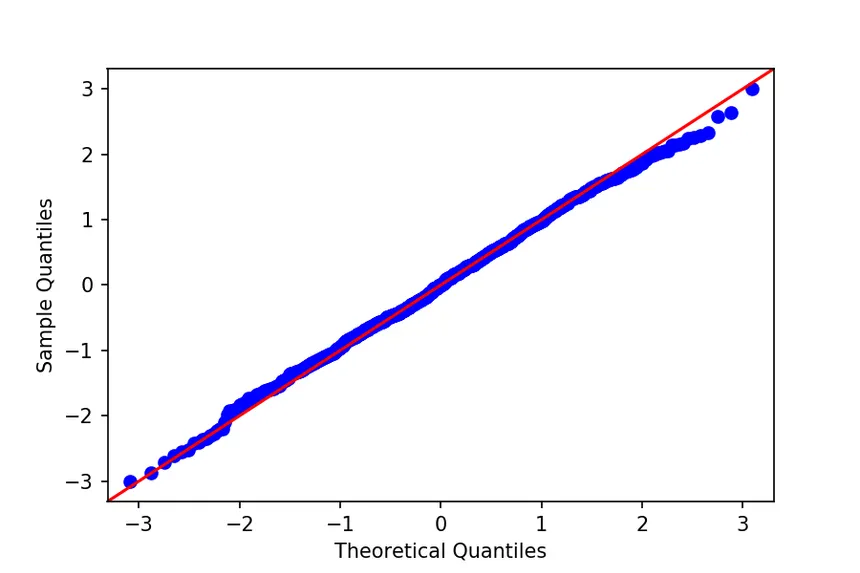

`How to interpret QQ plots`

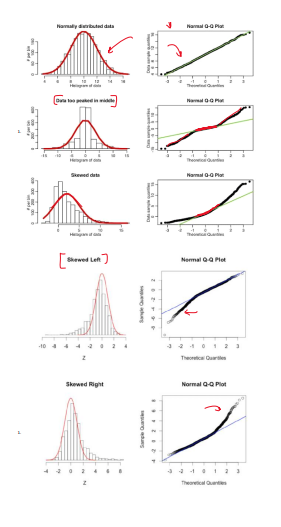  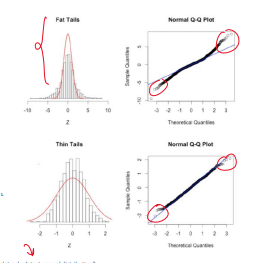

- Does QQ plot only detect Normal plots :
    NOO!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='Density'>

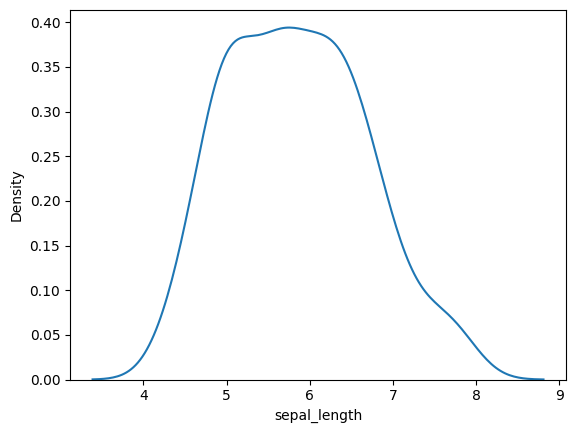

In [4]:
sns.kdeplot(df['sepal_length'])

In [5]:
temp = sorted(df['sepal_length'].tolist())

In [6]:
y_quant = []

for i in range(1,101):
  y_quant.append(np.percentile(temp,i))

In [7]:
samples = np.random.normal(loc=0,scale=1,size=1000)

In [8]:
x_quant = []

for i in range(1,101):
  x_quant.append(np.percentile(samples,i))

<Axes: >

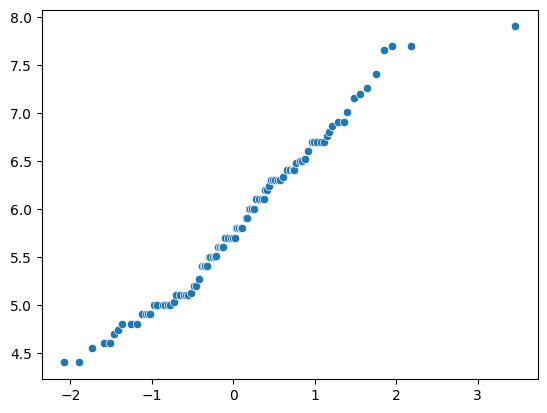

In [9]:
sns.scatterplot(x=x_quant, y=y_quant)

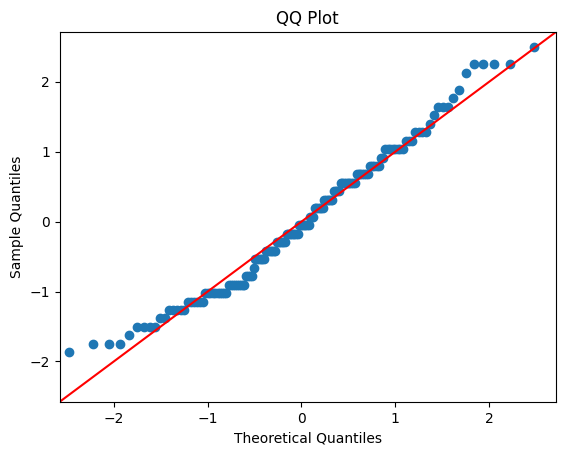

In [11]:
# using statsmodel
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot of the two sets of data
fig = sm.qqplot(df['sepal_length'], line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

(array([ 96., 102., 101.,  98., 102.,  88., 117.,  92.,  99., 105.]),
 array([8.13318298e-04, 1.00708074e-01, 2.00602829e-01, 3.00497585e-01,
        4.00392340e-01, 5.00287096e-01, 6.00181852e-01, 7.00076607e-01,
        7.99971363e-01, 8.99866118e-01, 9.99760874e-01]),
 <BarContainer object of 10 artists>)

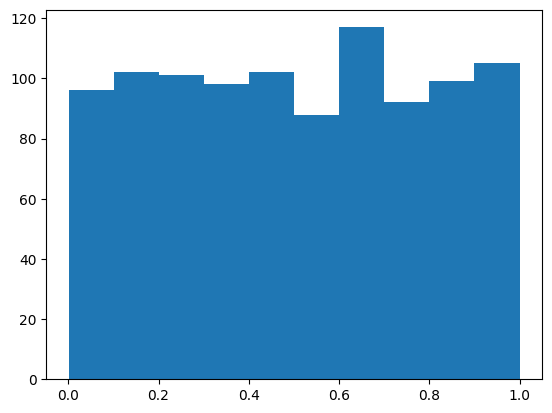

In [ ]:
# QQ plot for uniform distribution

import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a set of random data for unifrom distribution 
x = np.random.uniform(low=0, high=1, size=1000)

plt.hist(x)

In [13]:
# Fit a uniform distribution to the data
params = stats.uniform.fit(x)
dist = stats.uniform(loc=params[0], scale=params[1])

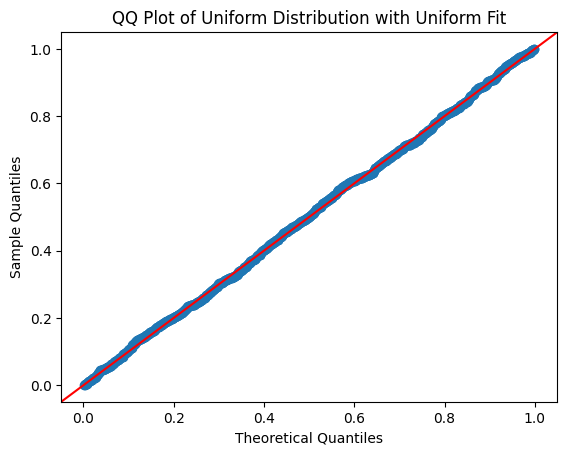

In [14]:
# Create a QQ plot of the data using the uniform distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Uniform Distribution with Uniform Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()